In [1]:
import json
import h5py
from load_data import *
from model import *
from plotting import *
import tensorflow as tf 
import os
from numpy import sqrt as sqrt

Importamos los ground truth del conjunto de entrenamiento y test. 

In [3]:
json_train = open('JSON FILES\DTS_SG_part_A.json')
json_test = open('JSON FILES\DTS_SG_part_A_TEST.json')
paths_train = json.load(json_train)
paths_test = json.load(json_test)

#Cargamos la data 
train_GT = mLoad_GT(paths_train, n=100)
train_img = mLoad_Img(paths_train, n=100)

test_GT = mLoad_GT(paths_test, n=50)
test_img = mLoad_Img(paths_test, n=50)

Construimos la red neuronal. Este sera un prototipo hasta siguiente cambio

In [3]:
#Definimos los sigmas
input_sigma = []
for i in range(5):
    input_sigma.append(0.25*(sqrt(2))**(i))
    
#Definimos el tamaño de nuestra imagen.   
input_shape = train_img[0,:,:,:].shape

#Creamos el modelo
model = Betsy(input_shape= input_shape, input_sigmas= input_sigma, input_kernel_size=(7, 7))


#model.build_graph(input_shape).summary()
#Compliamos el modelo
model.compile(loss = GAME_loss,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-6), 
              metrics = [sMAE(), RMSE()])

Entrenamos un poco para testeo!

In [4]:
checkpoint_path = "training/cp-0044.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [4]:
batch_size = 10

# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1)

model.fit(train_img, 
          train_GT, 
          batch_size = batch_size, 
          epochs = 1, 
          validation_data=(test_img, test_GT)) 
          #callbacks=[cp_callback])

1/1 [==============================] - 169s 169s/step - loss: 23174488064.0000 - sMAE: 0.0000e+00 - RMSE: 0.0000e+00 - val_loss: 765780544.0000 - val_sMAE: 0.0000e+00 - val_RMSE: 0.0000e+00


In [5]:
model.layers[0].deploy()
model.layers[1].deploy()
model.layers[2].deploy()
model.layers[3].deploy()
model.layers[4].deploy()

In [36]:
pre_trained = r"training\cp-0050.ckpt"

In [37]:
pre_trained

'training\\cp-0050.ckpt'

In [38]:
model.load_weights(pre_trained)

In [39]:
predict = model(test_img)

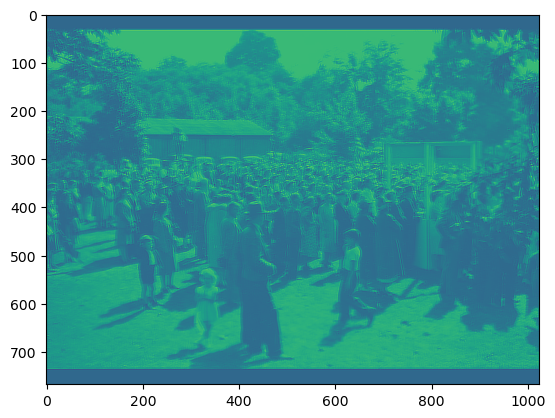

In [41]:
import matplotlib.pyplot as plt
plt.imshow(predict[0,:,:,0])

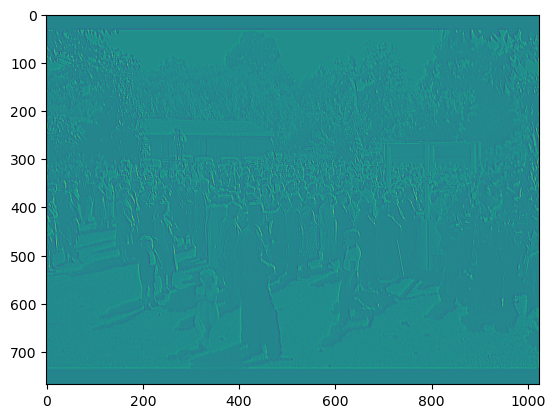

In [33]:
import matplotlib.pyplot as plt
plt.imshow(predict[0,:,:,:])